## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK [--] : [TOPIC] </div>

#### <div align="center"> Semester Ganjil 2022/2023 </div>

In [1]:
import datetime
import uuid    

# Fill in your name and NIM
myName = "Antonius Kevin Budi Saputra"
myNIM = "45444"

myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

# Header
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))

Name: 		Antonius Kevin Budi Saputra
NIM: 		45444
Start: 		2022-11-24 12:02:23.085271
Device ID: 	2e726148-6bb5-11ed-a955-068db3350b0c



---

### Dataset yang dipakai:

1. [Nama dataset1] – sumber : [cantumkan link dataset]
2. [Nama dataset2] – sumber : [cantumkan link dataset]

### Hasil kerja

In [109]:
import sys
import tensorflow.keras as tk
import pandas as pd
import sklearn as sk
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [71]:
covid = pd.read_csv("COVID-19.csv")

In [72]:
covid.head()

,iso,country,date,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases,...,total_tests,total_vaccinations,people_vaccinated,people_fully_vaccinated,gdp_ppp_per_capita,population,population_density,human_development_index,pop_age_above_65_percentage,health_index
0,AE,United Arab Emirates,2020-02-15,4.0,5.0,1.0,0.0,0.0,2.0,8,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
1,AE,United Arab Emirates,2020-02-16,4.0,4.0,1.0,1.0,1.0,2.0,9,...,5042.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
2,AE,United Arab Emirates,2020-02-17,1.0,5.0,1.0,-1.0,1.0,2.0,9,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
3,AE,United Arab Emirates,2020-02-18,1.0,5.0,1.0,-2.0,0.0,2.0,9,...,6693.0,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886
4,AE,United Arab Emirates,2020-02-19,0.0,4.0,1.0,-2.0,-1.0,2.0,9,...,NaN,NaN,NaN,NaN,75075.26,9865845.0,118.0,0.866,1.09,0.886


In [73]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53377 entries, 0 to 53376
Data columns (total 22 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   iso                                                 52974 non-null  object 
 1   country                                             53377 non-null  object 
 2   date                                                53377 non-null  object 
 3   grocery_and_pharmacy_percent_change_from_baseline   52362 non-null  float64
 4   parks_percent_change_from_baseline                  52177 non-null  float64
 5   residential_percent_change_from_baseline            52072 non-null  float64
 6   retail_and_recreation_percent_change_from_baseline  52405 non-null  float64
 7   transit_stations_percent_change_from_baseline       52534 non-null  float64
 8   workplaces_percent_change_from_baseline             53222 non-null  float64


In [74]:
covid.columns

Index(['iso', 'country', 'date',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline', 'confirmed_cases',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'],
      dtype='object')

In [75]:
covid.drop(columns=['iso', 'country', 'date',
       'confirmed_deaths', 'gov_response_stringency_index', 'total_tests',
       'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
       'gdp_ppp_per_capita', 'population', 'population_density',
       'human_development_index', 'pop_age_above_65_percentage',
       'health_index'], inplace=True)

In [76]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     1015
parks_percent_change_from_baseline                    1200
residential_percent_change_from_baseline              1305
retail_and_recreation_percent_change_from_baseline     972
transit_stations_percent_change_from_baseline          843
workplaces_percent_change_from_baseline                155
confirmed_cases                                          0
dtype: int64

In [77]:
covid.dropna(subset=['grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'residential_percent_change_from_baseline',
       'retail_and_recreation_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',], inplace=True)

In [9]:
covid.dropna(subset=['population', 'population_density','health_index'], inplace=True)

In [78]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51375 entries, 0 to 53376
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   51375 non-null  float64
 1   parks_percent_change_from_baseline                  51375 non-null  float64
 2   residential_percent_change_from_baseline            51375 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  51375 non-null  float64
 4   transit_stations_percent_change_from_baseline       51375 non-null  float64
 5   workplaces_percent_change_from_baseline             51375 non-null  float64
 6   confirmed_cases                                     51375 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.1 MB


In [11]:
covid.fillna(0, inplace=True)

In [79]:
covid.isna().sum()

grocery_and_pharmacy_percent_change_from_baseline     0
parks_percent_change_from_baseline                    0
residential_percent_change_from_baseline              0
retail_and_recreation_percent_change_from_baseline    0
transit_stations_percent_change_from_baseline         0
workplaces_percent_change_from_baseline               0
confirmed_cases                                       0
dtype: int64

In [80]:
covid.shape

(51375, 7)

In [81]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51375 entries, 0 to 53376
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   grocery_and_pharmacy_percent_change_from_baseline   51375 non-null  float64
 1   parks_percent_change_from_baseline                  51375 non-null  float64
 2   residential_percent_change_from_baseline            51375 non-null  float64
 3   retail_and_recreation_percent_change_from_baseline  51375 non-null  float64
 4   transit_stations_percent_change_from_baseline       51375 non-null  float64
 5   workplaces_percent_change_from_baseline             51375 non-null  float64
 6   confirmed_cases                                     51375 non-null  int64  
dtypes: float64(6), int64(1)
memory usage: 3.1 MB


In [15]:
moved_column = covid.pop("confirmed_cases")

In [16]:
covid.insert(12, "confirmed_cases", moved_column)

In [82]:
covid.head()

,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,residential_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,confirmed_cases
0,4.0,5.0,1.0,0.0,0.0,2.0,8
1,4.0,4.0,1.0,1.0,1.0,2.0,9
2,1.0,5.0,1.0,-1.0,1.0,2.0,9
3,1.0,5.0,1.0,-2.0,0.0,2.0,9
4,0.0,4.0,1.0,-2.0,-1.0,2.0,9


In [83]:
covid_data = covid.values

In [84]:
covid_data

array([[ 4.0000e+00,  5.0000e+00,  1.0000e+00, ...,  0.0000e+00,
         2.0000e+00,  8.0000e+00],
       [ 4.0000e+00,  4.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         2.0000e+00,  9.0000e+00],
       [ 1.0000e+00,  5.0000e+00,  1.0000e+00, ...,  1.0000e+00,
         2.0000e+00,  9.0000e+00],
       ...,
       [ 5.1000e+01,  2.5000e+01, -1.0000e+00, ...,  2.7000e+01,
         1.5000e+01,  3.6678e+04],
       [ 3.3000e+01,  1.4000e+01,  0.0000e+00, ...,  1.6000e+01,
        -1.0000e+00,  3.6691e+04],
       [ 3.4000e+01,  1.1000e+01,  1.0000e+00, ...,  7.0000e+00,
        -1.0000e+00,  3.6704e+04]])

In [85]:
X = covid_data[:, 0:6]

In [86]:
X.shape

(51375, 6)

In [87]:
X

array([[ 4.,  5.,  1.,  0.,  0.,  2.],
       [ 4.,  4.,  1.,  1.,  1.,  2.],
       [ 1.,  5.,  1., -1.,  1.,  2.],
       ...,
       [51., 25., -1., 20., 27., 15.],
       [33., 14.,  0., 11., 16., -1.],
       [34., 11.,  1.,  7.,  7., -1.]])

In [88]:
Y = covid_data[:, 6]

In [89]:
Y

array([8.0000e+00, 9.0000e+00, 9.0000e+00, ..., 3.6678e+04, 3.6691e+04,
       3.6704e+04])

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [90]:
mms = MinMaxScaler()
X_scaled = mms.fit_transform(X)

In [91]:
X_scaled

array([[0.39230769, 0.17017828, 0.4       , 0.57738095, 0.51851852,
        0.55172414],
       [0.39230769, 0.16855754, 0.4       , 0.58333333, 0.52380952,
        0.55172414],
       [0.38076923, 0.17017828, 0.4       , 0.57142857, 0.52380952,
        0.55172414],
       ...,
       [0.57307692, 0.20259319, 0.37777778, 0.69642857, 0.66137566,
        0.62643678],
       [0.50384615, 0.18476499, 0.38888889, 0.64285714, 0.6031746 ,
        0.53448276],
       [0.50769231, 0.17990276, 0.4       , 0.61904762, 0.55555556,
        0.53448276]])

In [92]:
X_train, X_vt, Y_train, Y_vt = train_test_split(X_scaled, Y, test_size=0.2)

In [93]:
X_test, X_val, Y_test, Y_val = train_test_split(X_vt, Y_vt, test_size=0.5)

In [94]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(41100, 6) (5138, 6) (5137, 6) (41100,) (5138,) (5137,)


In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, LSTM

In [97]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [100]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(6,)),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [61]:
model = Sequential([LSTM(50, input_shape=(12,15), return_sequences = False),
                   Dropout(0.8),
                   Dense(1, activation = 'sigmoid')])

In [105]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [104]:
hist = model.fit(X_train, Y_train,
          batch_size=16, epochs=10, 
          validation_data=(X_val, Y_val),
                verbose = 2)

Epoch 1/10
2569/2569 - 2s - loss: -2.3145e+09 - accuracy: 0.0076 - val_loss: -7.8834e+09 - val_accuracy: 0.0090 - 2s/epoch - 747us/step
Epoch 2/10
2569/2569 - 2s - loss: -2.2573e+10 - accuracy: 0.0076 - val_loss: -4.2330e+10 - val_accuracy: 0.0090 - 2s/epoch - 630us/step
Epoch 3/10
2569/2569 - 2s - loss: -7.6404e+10 - accuracy: 0.0076 - val_loss: -1.1444e+11 - val_accuracy: 0.0090 - 2s/epoch - 629us/step
Epoch 4/10
2569/2569 - 2s - loss: -1.7032e+11 - accuracy: 0.0076 - val_loss: -2.3000e+11 - val_accuracy: 0.0090 - 2s/epoch - 631us/step
Epoch 5/10
2569/2569 - 2s - loss: -3.1077e+11 - accuracy: 0.0076 - val_loss: -3.9654e+11 - val_accuracy: 0.0090 - 2s/epoch - 633us/step
Epoch 6/10
2569/2569 - 2s - loss: -5.1040e+11 - accuracy: 0.0076 - val_loss: -6.2405e+11 - val_accuracy: 0.0090 - 2s/epoch - 638us/step
Epoch 7/10
2569/2569 - 2s - loss: -7.7797e+11 - accuracy: 0.0076 - val_loss: -9.2405e+11 - val_accuracy: 0.0090 - 2s/epoch - 637us/step
Epoch 8/10
2569/2569 - 2s - loss: -1.1215e+12 - 

In [106]:
model.evaluate(X_test, Y_test)[1]

161/161 [==============================] - 0s 506us/step - loss: -2163034030080.0000 - accuracy: 0.0070


0.007007981184870005

In [107]:
model.predict(X_test)

161/161 [==============================] - 0s 423us/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [118]:
train = model.predict(X_train)
test = model.predict(X_test)

161/161 [==============================] - 0s 369us/step


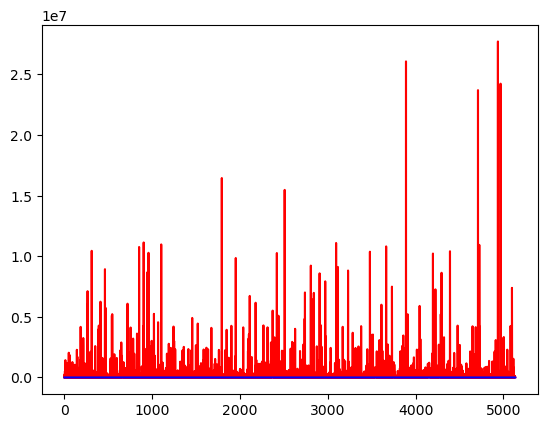

In [121]:
plt.plot(Y_test, color='r', label="RealData")
plt.plot(test, color='b', label='Predicted Test')
plt.show()

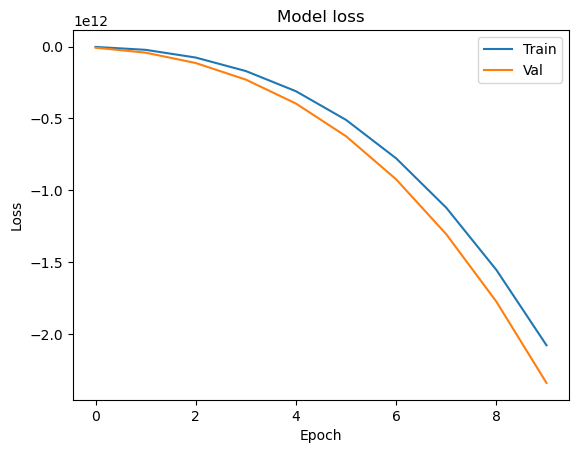

In [110]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

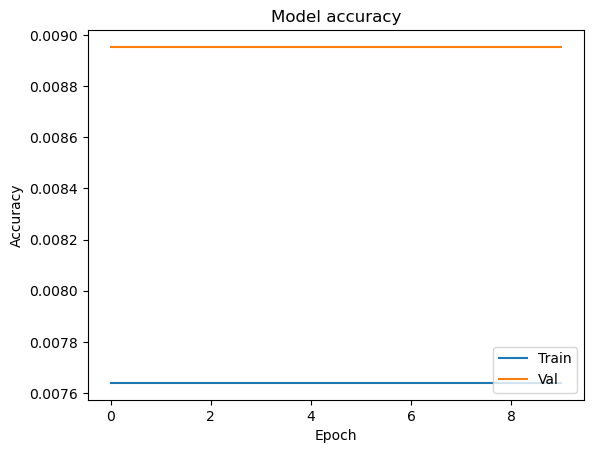

In [112]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [114]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(6,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=10,
          validation_data=(X_val, Y_val))

Epoch 1/10
1285/1285 [==============================] - 8s 6ms/step - loss: -855480313390825472.0000 - accuracy: 0.0076 - val_loss: -5102296353078247424.0000 - val_accuracy: 0.0090
Epoch 2/10
1285/1285 [==============================] - 8s 6ms/step - loss: -42050962941781475328.0000 - accuracy: 0.0076 - val_loss: -112431238797397590016.0000 - val_accuracy: 0.0090
Epoch 3/10
1285/1285 [==============================] - 8s 6ms/step - loss: -295615505484413403136.0000 - accuracy: 0.0076 - val_loss: -552902563390136778752.0000 - val_accuracy: 0.0090
Epoch 4/10
1285/1285 [==============================] - 8s 6ms/step - loss: -1046875173812409729024.0000 - accuracy: 0.0076 - val_loss: -1678029258471736606720.0000 - val_accuracy: 0.0090
Epoch 5/10
1285/1285 [==============================] - 8s 6ms/step - loss: -2756249696796877520896.0000 - accuracy: 0.0076 - val_loss: -3977127142081024753664.0000 - val_accuracy: 0.0090
Epoch 6/10
1285/1285 [==============================] - 8s 6ms/step - lo

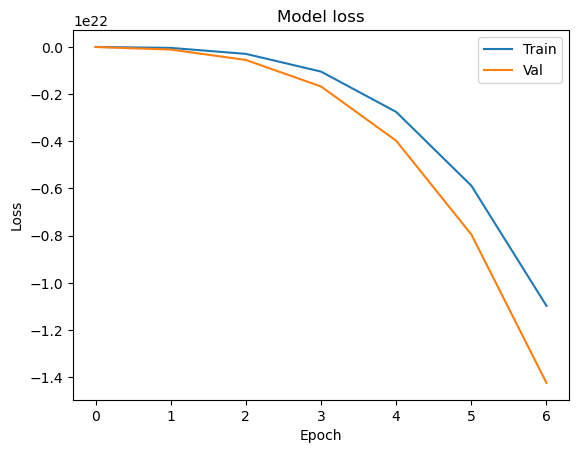

In [115]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

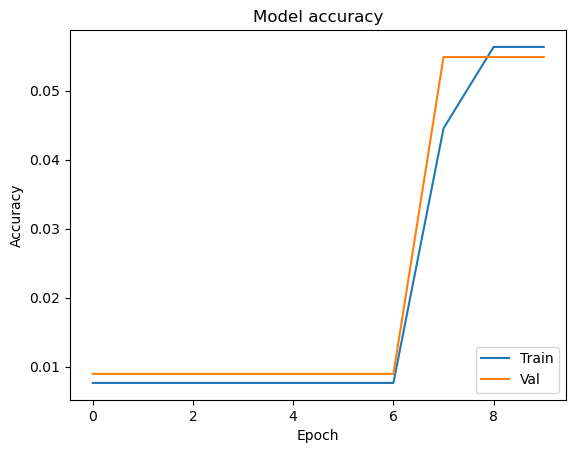

In [117]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Simpulan perbandingan dataset
    - Hasil akurasi yang diberikan (jika ada dalam modul)
    - Hasil perbandingan akurasi antara algoritma (jika ada dalam modul)
    - Hasil pemikiran dan observasi akhir dari kerja menurut mahasiswa.

In [37]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t{}".format(myName))
print("NIM: \t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 	Antonius Kevin Budi Saputra
NIM: 	45444
Time-stamp:	2022-11-24 12:02:44.899505


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [38]:
!jupyter nbconvert --to html "./IF540L_kelas_A_laporan_MXX_45444_Antonius Kevin.ipynb" --output-dir="./"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook ./IF540L_kelas_A_laporan_MXX_45444_Antonius Kevin.ipynb to html
[NbConvertApp] Writing 639785 bytes to IF540L_kelas_A_laporan_MXX_45444_Antonius Kevin.html


### Next step:
* convert the generated html file to PDF using the online tool: https://www.sejda.com/html-to-pdf
* choose the following settings:
    * Page size: One long page
    * Page Orientation: auto
    * Use print stylesheet
* Submit your ipython notebook and PDF files

Markdown basics https://markdown-guide.readthedocs.io/en/latest/basics.html#